In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]

In [3]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print("Accuracy com cross validation = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

<AxesSubplot: xlabel='km_por_ano', ylabel='preco'>

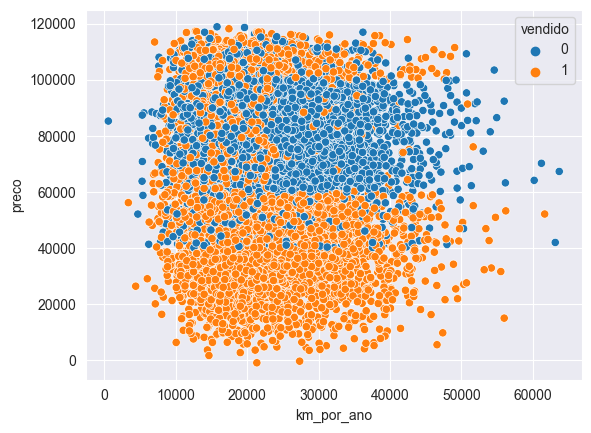

In [4]:
x = dados[['preco','idade_do_modelo','km_por_ano']]
y = dados['vendido']
sns.scatterplot(x='km_por_ano',y='preco',hue='vendido',data=dados)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


In [6]:
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(X_train, y_train)
acuracia = dummy_stratified.score(X_test, y_test) * 100

print("A acurácia do dummy stratified foi de %.2f%%" % acuracia)


A acurácia do dummy stratified foi de 48.88%


In [7]:
modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(X_train,y_train)
prev = modelo.predict(X_test)

print(f'Acurácia do modelo: {round(accuracy_score(y_test,prev),2)*100}%')


Acurácia do modelo: 75.0%


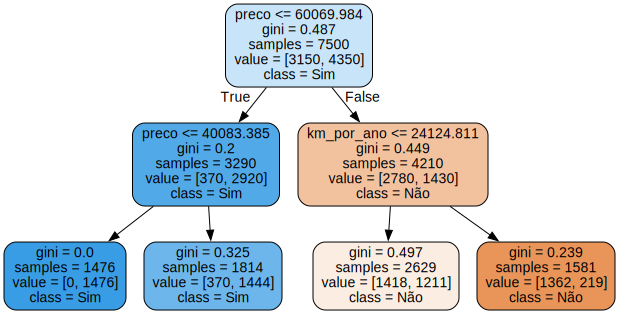

In [8]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled = True, rounded=True, feature_names=features, class_names=['Não','Sim'])
grafico = graphviz.Source(dot_data)
grafico

In [9]:
seed = 42
np.random.seed(seed)

modelo = DecisionTreeClassifier(max_depth=2)
results  = cross_validate(modelo, x, y, cv = 3, return_train_score=False)
imprime_resultados(results)

Accuracy com cross validation = [74.99, 76.57]


In [10]:
seed = 42
np.random.seed(seed)

modelo = DecisionTreeClassifier(max_depth=2)
results  = cross_validate(modelo, x, y, cv = 5, return_train_score=False)
imprime_resultados(results)

Accuracy com cross validation = [75.21, 76.35]


In [11]:
seed = 42
np.random.seed(seed)

modelo = DecisionTreeClassifier(max_depth=2)
results  = cross_validate(modelo, x, y, cv = 10, return_train_score=False)
imprime_resultados(results)

Accuracy com cross validation = [74.24, 77.32]


In [12]:
seed = 42
np.random.seed(seed)

cv = StratifiedKFold(n_splits = 10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results  = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy com cross validation = [72.44, 79.12]


In [13]:
seed = 42
np.random.seed(seed)

dados["modelo"] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min())
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,20
1,40557.96,1,20,12622.05362,23
2,89627.50,0,12,11440.79806,13
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,7


In [14]:
seed = 42
np.random.seed(seed)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results  = cross_validate(modelo, x, y, cv = cv, return_train_score=False, groups = dados.modelo)
imprime_resultados(results)

Accuracy com cross validation = [72.29, 79.26]


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

seed = 42
np.random.seed(seed)

scaler = StandardScaler()
scaler.fit(X_train)
treino_x_escalado = scaler.transform(X_train)
teste_x_escalado = scaler.transform(X_test)

modelo = SVC()
modelo.fit(treino_x_escalado, y_train)
previsoes = modelo.predict(teste_x_escalado)

acuracia = accuracy_score(y_test, previsoes) * 100
print("A acurácia foi de %.2f %%" % acuracia)

A acurácia foi de 76.04 %


In [16]:
seed = 42
np.random.seed(seed)

cv = GroupKFold(n_splits = 10)
modelo = SVC()
results  = cross_validate(modelo, x, y, cv = cv, return_train_score=False, groups = dados.modelo)
imprime_resultados(results)

Accuracy com cross validation = [73.96, 80.42]


In [17]:
from sklearn.pipeline import Pipeline

seed = 42
np.random.seed(seed)

scaler =StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits = 10)
result = cross_validate(pipeline, x, y, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy com cross validation = [73.96, 80.42]


In [18]:
from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth):
  SEED = 42
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  print("max_depth = %d, media teste = %.2f, media treino = %.2f" % (max_depth, results['test_score'].mean() * 100,results['train_score'].mean()*100))
  return max_depth, results['test_score'].mean(), results['train_score'].mean()

depth_list = list()
test_score_mean_list = list()
train_score_mean_list = list()
for i in range (1, 33):
     max_depth, test_score, train_score = roda_arvore_de_decisao(i)
     depth_list.append(max_depth)
     test_score_mean_list.append(test_score)
     train_score_mean_list.append(train_score)



max_depth = 1, media teste = 75.75, media treino = 75.79
max_depth = 2, media teste = 75.75, media treino = 75.79
max_depth = 3, media teste = 78.64, media treino = 78.76
max_depth = 4, media teste = 78.55, media treino = 78.81
max_depth = 5, media teste = 78.54, media treino = 78.97
max_depth = 6, media teste = 78.33, media treino = 79.17
max_depth = 7, media teste = 77.88, media treino = 79.46
max_depth = 8, media teste = 77.85, media treino = 79.85
max_depth = 9, media teste = 77.54, media treino = 80.33
max_depth = 10, media teste = 77.19, media treino = 81.04
max_depth = 11, media teste = 76.73, media treino = 81.90
max_depth = 12, media teste = 76.49, media treino = 82.75
max_depth = 13, media teste = 75.88, media treino = 83.68
max_depth = 14, media teste = 75.51, media treino = 84.67
max_depth = 15, media teste = 75.24, media treino = 85.68
max_depth = 16, media teste = 74.88, media treino = 86.73
max_depth = 17, media teste = 74.15, media treino = 87.79
max_depth = 18, media t

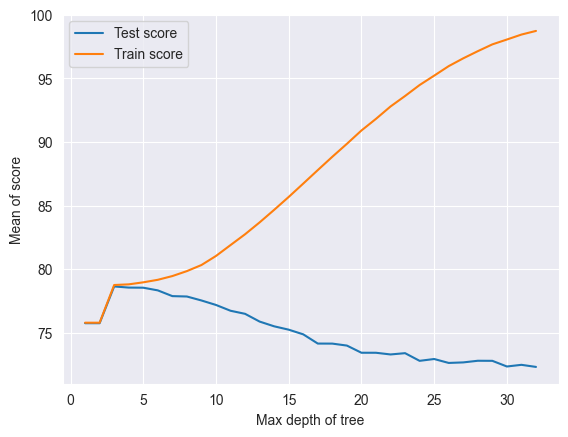

In [19]:
test_score_mean_list = [item * 100 for item in test_score_mean_list]
train_score_mean_list = [item * 100 for item in train_score_mean_list]

plt.plot(depth_list, test_score_mean_list, label = 'Test score')
plt.plot(depth_list, train_score_mean_list, label = 'Train score')
plt.xlabel('Max depth of tree')
plt.ylabel('Mean of score')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 42
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.75
Arvore max_depth = 1, min_samples_leaf = 192, treino = 75.79, teste = 75.75
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.75
Arvore max_depth = 1, min_samples_leaf = 512, treino = 75.79, teste = 75.75
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.75
Arvore max_depth = 2, min_samples_leaf = 192, treino = 75.79, teste = 75.75
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.75
Arvore max_depth = 2, min_samples_leaf = 512, treino = 75.79, teste = 75.75
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.65
Arvore max_depth = 3, min_samples_leaf = 192, treino = 78.75, teste = 78.65
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.65
Arvore max_depth = 3, min_samples_leaf = 512, treino = 77.52, teste = 77.46
Arvore max_depth = 4, min_samples_leaf = 128, treino = 78.75, teste = 78.65
Arvore max_d

,max_depth,min_samples_leaf,train,test
0,1,128,75.792135,75.75301
1,1,192,75.792135,75.75301
2,1,256,75.792135,75.75301
3,1,512,75.792135,75.75301
4,2,128,75.792135,75.75301


In [34]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
10,3,256,78.752152,78.653748
13,4,192,78.752152,78.653748
8,3,128,78.752152,78.653748
9,3,192,78.752152,78.653748
14,4,256,78.752152,78.653748


<AxesSubplot: >

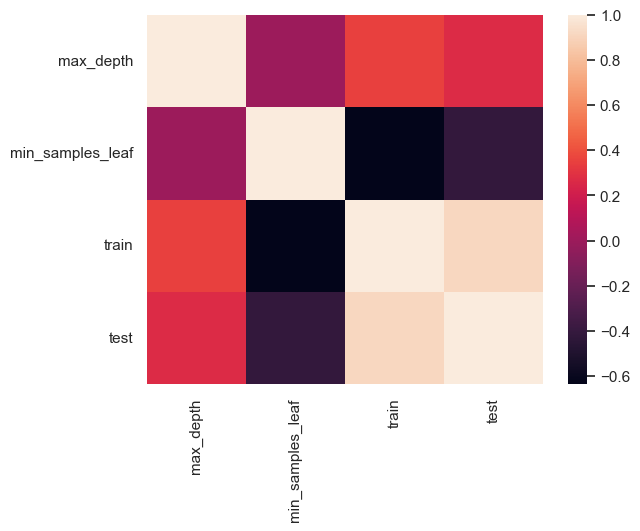

In [35]:
corr = resultados.corr()
sns.heatmap(corr)

array([[<AxesSubplot: xlabel='max_depth', ylabel='max_depth'>,
        <AxesSubplot: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <AxesSubplot: xlabel='train', ylabel='max_depth'>,
        <AxesSubplot: xlabel='test', ylabel='max_depth'>],
       [<AxesSubplot: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <AxesSubplot: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <AxesSubplot: xlabel='train', ylabel='min_samples_leaf'>,
        <AxesSubplot: xlabel='test', ylabel='min_samples_leaf'>],
       [<AxesSubplot: xlabel='max_depth', ylabel='train'>,
        <AxesSubplot: xlabel='min_samples_leaf', ylabel='train'>,
        <AxesSubplot: xlabel='train', ylabel='train'>,
        <AxesSubplot: xlabel='test', ylabel='train'>],
       [<AxesSubplot: xlabel='max_depth', ylabel='test'>,
        <AxesSubplot: xlabel='min_samples_leaf', ylabel='test'>,
        <AxesSubplot: xlabel='train', ylabel='test'>,
        <AxesSubplot: xlabel='test', ylabel='test'>]], dty

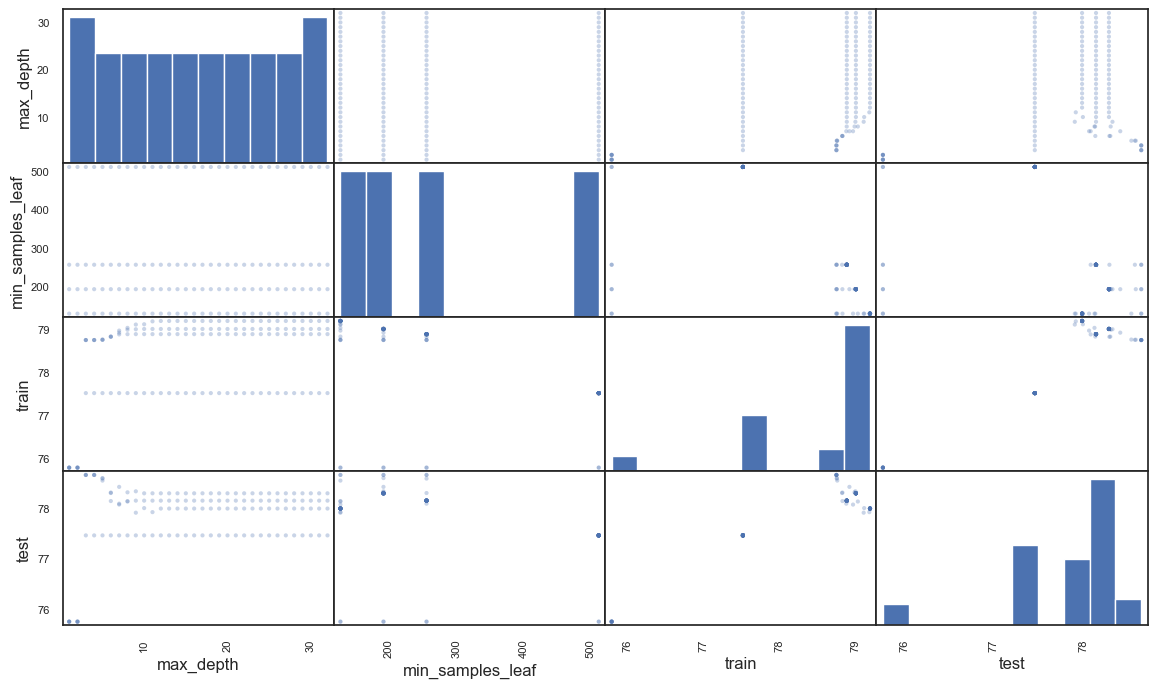

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

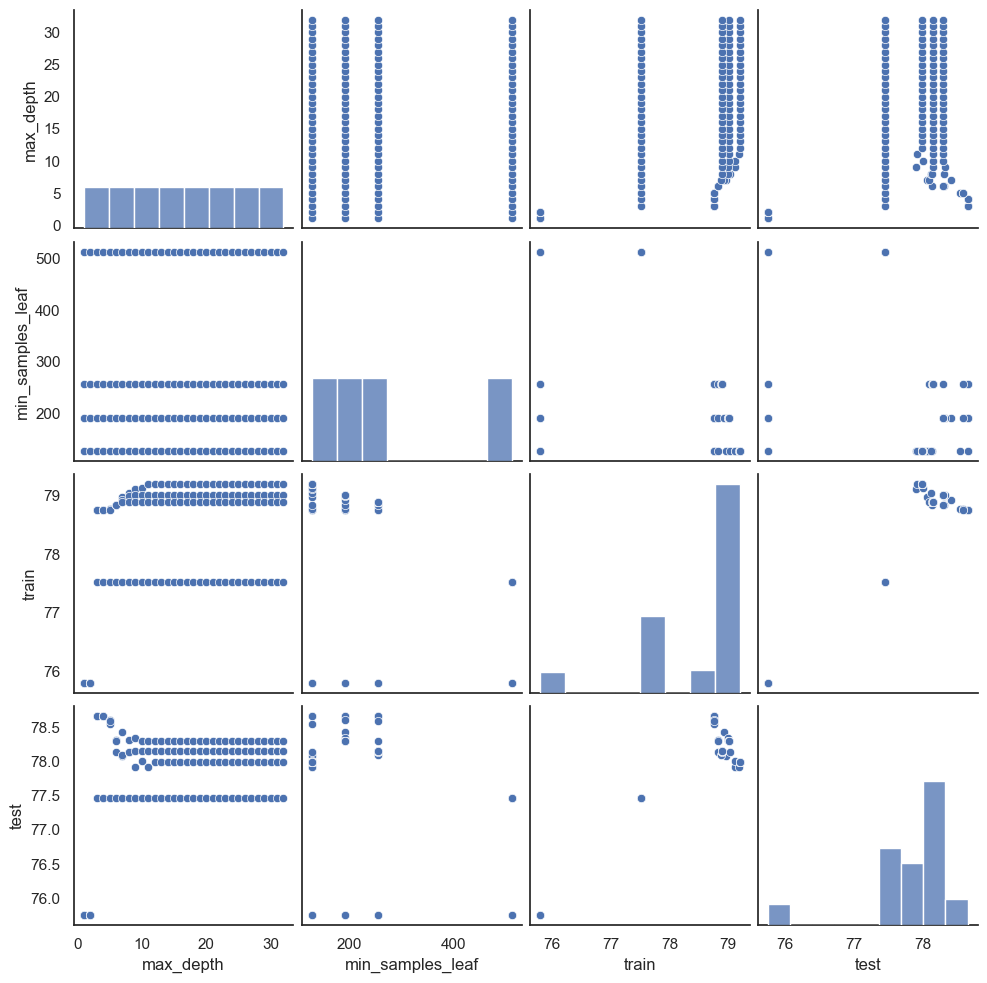

In [37]:
sns.pairplot(resultados)

C:\Users\dmm\AppData\Local\Temp\ipykernel_5376\3792064364.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot: >

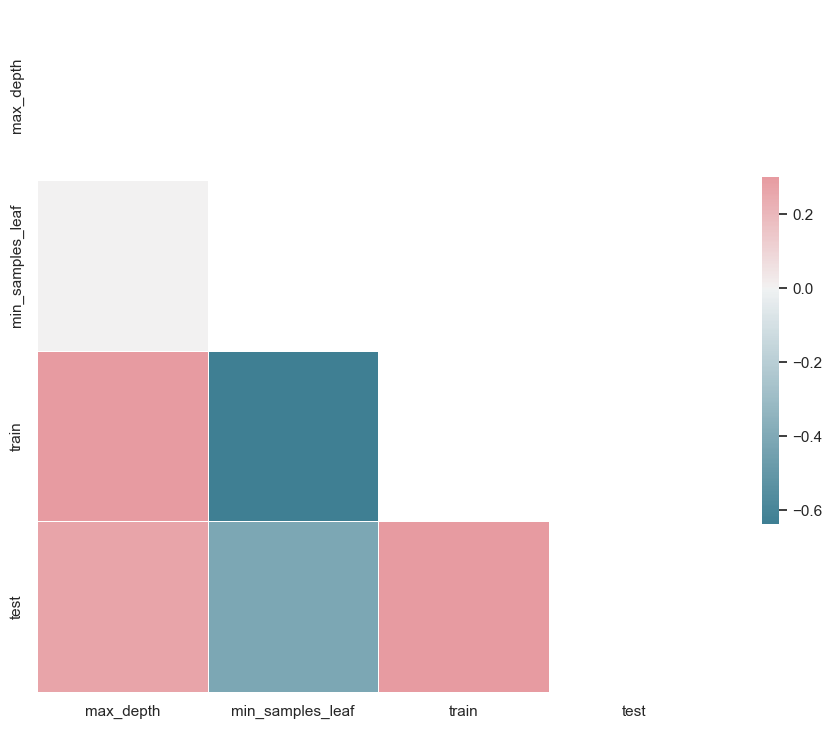

In [38]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [41]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
        for min_samples_split in [32, 64, 128, 256]:
          tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
          resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.792135,75.75301,0.004980,0.001562
1,1,32,64,75.792135,75.75301,0.003904,0.001171
2,1,32,128,75.792135,75.75301,0.004008,0.000970
3,1,32,256,75.792135,75.75301,0.003911,0.001079
4,1,64,32,75.792135,75.75301,0.006636,0.002538


In [42]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
61,4,256,64,78.752152,78.653748,0.009569,0.001362
40,3,128,32,78.752152,78.653748,0.008198,0.001758
58,4,128,128,78.752152,78.653748,0.009340,0.001370
60,4,256,32,78.752152,78.653748,0.009911,0.001611
59,4,128,256,78.752152,78.653748,0.009736,0.001366


In [43]:
from sklearn.model_selection import GridSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009838,0.001329,0.001851,0.000531,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790744,...,0.79,0.801005,0.781633,0.772317,0.759878,0.795411,0.787339,0.786537,0.012354,1
1,0.010108,0.001486,0.001757,0.000390,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790744,...,0.79,0.801005,0.781633,0.772317,0.759878,0.795411,0.787339,0.786537,0.012354,1
2,0.008202,0.000483,0.001171,0.000390,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790744,...,0.79,0.801005,0.781633,0.772317,0.759878,0.795411,0.787339,0.786537,0.012354,1
3,0.014269,0.004077,0.003127,0.001678,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790744,...,0.79,0.801005,0.781633,0.772317,0.759878,0.795411,0.787339,0.786537,0.012354,1
4,0.013703,0.002290,0.003218,0.001637,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.790744,...,0.79,0.801005,0.781633,0.772317,0.759878,0.795411,0.787339,0.786537,0.012354,1


In [44]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.65374799994729


In [47]:
melhor = busca.best_estimator_

In [48]:
from sklearn.metrics import accuracy_score

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100

print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008199,0.000995,0.001756,0.000390,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.007222,0.000478,0.001758,0.000391,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.006840,0.000015,0.001366,0.000478,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.006644,0.000390,0.001163,0.000390,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.006838,0.000629,0.001364,0.000494,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [56]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 78.67
Intervalo [76.80, 80.54]
DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


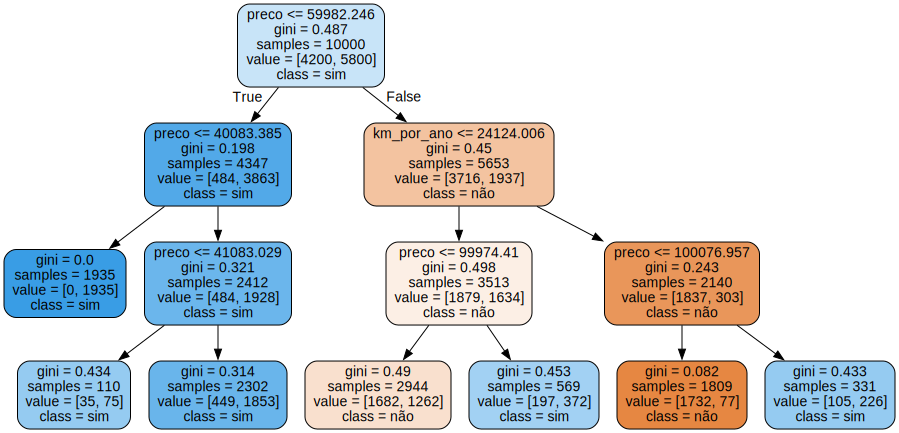

In [57]:
from sklearn.tree import export_graphviz
import graphviz


features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph

In [59]:
from sklearn.model_selection import RandomizedSearchCV

SEED=42
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter = 16,
                    cv = KFold(n_splits = 5),
                          random_state = SEED)


busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012295,0.000480,0.001373,0.000473,128,128,5,entropy,"{'min_samples_split': 128, 'min_samples_leaf':...",0.4330,0.4535,0.771,0.7395,0.7725,0.6339,0.156245,4
1,0.008798,0.000017,0.001359,0.000470,64,64,5,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.4240,0.4525,0.771,0.7550,0.7445,0.6294,0.156561,6
2,0.008577,0.000384,0.000988,0.000015,128,128,3,entropy,"{'min_samples_split': 128, 'min_samples_leaf':...",0.4015,0.4175,0.771,0.7655,0.7725,0.6256,0.176533,10
3,0.011831,0.000459,0.001359,0.000487,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.4240,0.4535,0.771,0.7500,0.7445,0.6286,0.155544,8
4,0.008781,0.000621,0.001370,0.000475,64,128,5,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.4330,0.4525,0.771,0.7420,0.7725,0.6342,0.156817,1


In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))

imprime_score(scores)

Accuracy médio 78.36
Intervalo [75.54, 81.18]


In [68]:
from scipy.stats import randint

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ["gini", "entropy"]

}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter = 300,
                    cv = KFold(n_splits = 5, shuffle=True),
                          random_state = SEED)


busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010158,0.000983,0.001554,0.000472,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7840,0.7760,0.8025,0.7930,0.7795,0.7870,0.009618,1
1,0.012315,0.000992,0.001160,0.000377,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7740,0.7725,0.7830,0.7805,0.7725,0.7765,0.004393,224
2,0.010934,0.000392,0.001107,0.000237,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7705,0.7745,0.7990,0.7790,0.7735,0.7793,0.010221,134
3,0.014250,0.000491,0.001171,0.000398,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7575,0.7730,0.7725,0.7835,0.7560,0.7685,0.010378,296
4,0.020987,0.006573,0.002944,0.001729,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7705,0.7735,0.7995,0.7790,0.7745,0.7794,0.010413,128


In [69]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 78.69
Intervalo [77.64, 79.74]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [70]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)

In [72]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +- (%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 116, 'min_samples_split': 98}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 43, 'min_samples_split': 55}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 50}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 41, 'min_samples_split': 125}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 86, 'min_samples_split': 118}
0.787 +- (0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 106, 'min_samples_split': 108}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 62}
0.787 +- (0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787 +- (0.019) {'criterion': 'entropy', 'ma

In [75]:
from sklearn.ensemble import RandomForestClassifier

SEED=42
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068532,0.036297,0.004685,0.001138,gini,3,32,32,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7725,0.772,0.7600,0.7730,0.7715,0.7698,0.004925,56
1,0.325452,0.006517,0.018423,0.000446,gini,3,32,32,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7770,0.769,0.7735,0.7795,0.7695,0.7737,0.004106,40
2,0.034568,0.001292,0.003513,0.000478,gini,3,32,64,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7595,0.752,0.7225,0.7830,0.7565,0.7547,0.019346,72
3,0.360321,0.025479,0.022254,0.005500,gini,3,32,64,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7770,0.771,0.7730,0.7800,0.7695,0.7741,0.003878,35
4,0.035329,0.001167,0.003305,0.000475,gini,3,32,128,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7650,0.773,0.7740,0.7790,0.7505,0.7683,0.009968,59


In [76]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.782 +-(0.011) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.781 +-(0.008) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.779 +-(0.012) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 100}
0.777 +-(0.019) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 128, 'min_samples_split': 128, 'n_estimators': 10}
0.777 +-(0.005) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 100}


In [77]:
import time
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 387.44 segundos
Accuracy médio 77.57
Intervalo [76.02, 79.12]
RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=32,
                       min_samples_split=64, n_estimators=10)


In [78]:
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split": randint(32, 129),
    "min_samples_leaf": randint(32, 129),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 80,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 93.53 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.331817,0.077218,0.017953,0.000998,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7715,0.7620,0.7750,0.7855,0.7580,0.7704,0.009744,75
1,0.280036,0.012035,0.016107,0.000437,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7715,0.7575,0.7925,0.7855,0.7575,0.7729,0.014277,63
2,0.254719,0.006642,0.015234,0.000483,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7685,0.7695,0.7925,0.7795,0.7575,0.7735,0.011781,59
3,0.257621,0.062105,0.015085,0.004565,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7670,0.7830,0.7865,0.7580,0.7733,0.010429,60
4,0.284673,0.008877,0.015023,0.000471,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7685,0.7930,0.7850,0.7585,0.7754,0.012220,30


In [79]:
from sklearn.model_selection import StratifiedShuffleSplit



SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split": randint(32, 129),
    "min_samples_leaf": randint(32, 129),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 5,
                    cv = split)
busca.fit(x_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 2.11 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.287158,0.0,0.017568,0.0,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7785,0.7785,0.0,2
1,0.690754,0.0,0.017097,0.0,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7795,0.7795,0.0,1
2,0.273177,0.0,0.015620,0.0,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7735,0.7735,0.0,5
3,0.174004,0.0,0.010767,0.0,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7775,0.7775,0.0,3
4,0.270351,0.0,0.014642,0.0,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7755,0.0,4
